# Minimo Quadrado
Objetivo: Calcular uma função que represente os casos acumulados de covid através do método dos minimos quadrados. As informações presentes neste algoritimo foram tiradas do site do governo federal no dia 14/05/2022.

## Formula
$x = (A^{t}A)^{-1}A^{t}b$, onde A é uma matriz

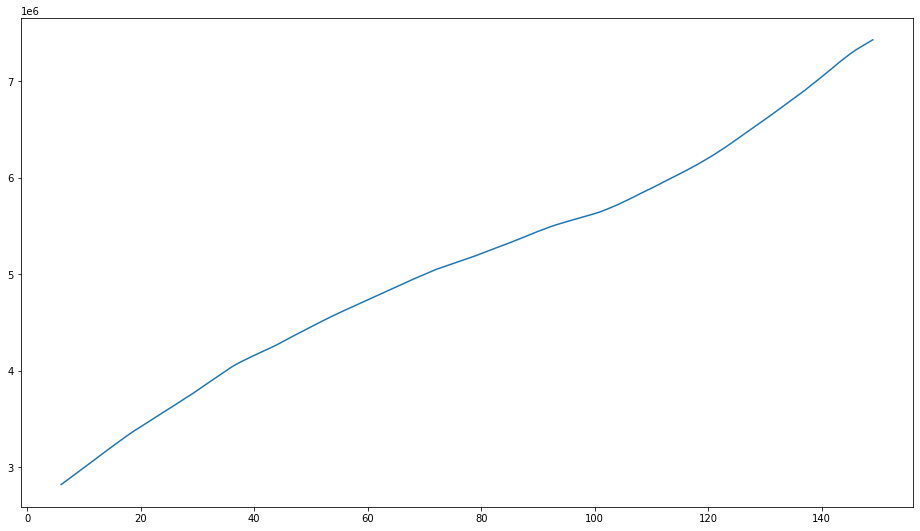

In [ ]:
import numpy as np
import pandas as pd

# Preparando dados
dados = pd.read_csv("HIST_PAINEL_COVIDBR_2020_Parte2_13fev2022.csv", sep=";")
brasil = dados[dados['regiao']=='Brasil']
media = brasil['casosAcumulado'].rolling(7).mean()
media[:150].plot(figsize=(16,9))

Podemos observar que a função se comporta de forma linear entre do intervalo de 40 à 100, por isso selecionaremos este intervalo para o calculo.

In [ ]:
# Selecionando Janela de tempo onde a função de comporta de forma LINEAR
inicio = 40
fim = 100

# Calculando os minimos quadrados para funções LINEARES
dias = np.array(list(range(inicio, fim)))
y = media.values[inicio:fim]
x = np.ones((len(dias),2))
x[:,1] = dias

coef =  np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))

# Prediz os valores através dos coeficientes
def reta(x, a, b):
  return a+b*x

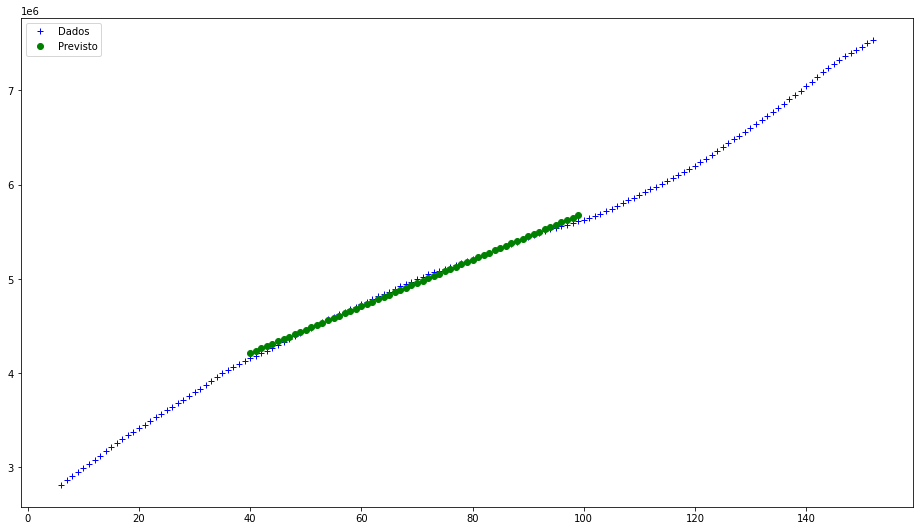

In [ ]:
# Plotando os dados reais com os valores previstos
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 9))

plt.plot(media.values, 'b+', label='Dados')
plt.plot(dias, reta(dias, coef[0],coef[1]), 'go', label='Previsto')
plt.legend()